# Telecomunicaciones


## Descomposición de tareas

### Definir objetivos
- **Identificar operadores ineficaces**, operadores con:
    - Muchas llamadas entrantes perdidas (internas y externas)
    - Mucho tiempo de espera para llamadas entrantes
    - Pocas llamadas salientes

### Preprocesamiento de datos
- Estudiar valores ausentes
- Estudiar valores duplicados
- Eliminar duplicados
- Reemplazar valores ausentes
- Convertir tipos
- Estudiar el tipo de correspondencia (dirección(?))
- Comprobar la exactitud de los nombres de columnas
- Renombrar las columnas

## Enriquecimiento de datos
- Calcular total de llamadas por operador
- Calcular porcentaje de llamadas perdidas por operador
- Calcular promedio de duración total y tiempo de espera
- Unir métricas por operador en un solo dataset

### Análisis exploratorio
- Organizar data set por operator_id
- Analizar las llamadas entrantes perdidas
      - Separar las llamadas entrantes perdidas internas de las externas
- Revisar los tiempos de espera para las Llamadas entrantes
- Identificar operadores con pocas llamadas salientes
- Graficar cada uno de los puntos pasados

### Conclusiones
- Identificar operadores con
      - Alto número de llamadas entrantes perdidas
      - Valores altos de tiempos de espera
      - Pocas llamadas salientes
- Analizar la relación entre Buenos operadores y malos operadores

## Preprocesamiento

In [1]:
# Cargar librerías

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datasets
clients = pd.read_csv('datasets/telecom_clients.csv')
data = pd.read_csv('datasets/telecom_dataset_new.csv')

### Cients

In [3]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [5]:
clients.describe()

,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


In [6]:
clients.user_id.nunique()

732

In [7]:
clients.tariff_plan.value_counts()

tariff_plan
C    395
B    261
A     76
Name: count, dtype: int64

In [8]:
clients.isnull().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [9]:
clients.duplicated().sum()

np.int64(0)

In [10]:
clients.date_start = pd.to_datetime(clients.date_start)
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


## Data

In [11]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [13]:
data[['calls_count', 'call_duration', 'total_call_duration']].describe()

,calls_count,call_duration,total_call_duration
count,53902.000000,53902.000000,53902.000000
mean,16.451245,866.684427,1157.133297
std,62.917170,3731.791202,4403.468763
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,47.000000
50%,4.000000,38.000000,210.000000
75%,12.000000,572.000000,902.000000
max,4817.000000,144395.000000,166155.000000


In [14]:
# Valores ausentes
data.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [15]:
# Veremos las filas con operator_id ausente
operator_null = data[data['operator_id'].isnull()]
operator_null.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
29855,167264,2019-11-08 00:00:00+03:00,in,False,NaN,True,9,0,350
46799,168128,2019-11-26 00:00:00+03:00,in,False,NaN,True,1,0,2
15163,166884,2019-11-12 00:00:00+03:00,in,False,NaN,True,1,0,2
15262,166896,2019-10-10 00:00:00+03:00,in,False,NaN,True,4,0,32
29194,167200,2019-11-05 00:00:00+03:00,in,False,NaN,True,14,0,9


In [16]:
# Veremos las filas con internal ausente
internal_null = data[data['internal'].isnull()]
internal_null.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37580,167626,2019-10-18 00:00:00+03:00,in,NaN,NaN,True,2,0,4
24494,167110,2019-09-23 00:00:00+03:00,in,NaN,NaN,True,1,0,12
21716,167035,2019-11-17 00:00:00+03:00,in,NaN,923526.0,False,1,68,77
7523,166604,2019-10-31 00:00:00+03:00,in,NaN,NaN,True,1,0,5
38099,167650,2019-10-17 00:00:00+03:00,in,NaN,921318.0,False,1,109,116


In [17]:
print(f'Porcentaje de nulos en Operator id: {(operator_null.shape[0] / data.shape[0]*100):.2f}%')
print(f'Porcentaje de nulos en Internal: {(internal_null.shape[0] / data.shape[0]*100):.2f}%')


Porcentaje de nulos en Operator id: 15.16%
Porcentaje de nulos en Internal: 0.22%


Dado que el porcentaje de valores nulos en internal es muy pequeño, lo borraremos. Esto no nos significará ningún cambio en los análisis.
Y también borraremos las filas faltantes en Operator id, ya que siendo nuestra tarea identificar operadores ineficientes, sin tener un operador responsable de los datos, ese dato no nos sirve de nada.

In [18]:
# Guardamos el tamaño original del dataset
initial_rows = data.shape[0]

# Eliminamos filas con nulos en 'operator_id' o 'internal'
data = data.dropna(subset=['operator_id', 'internal'])

# Comprobamos cuántas filas quedaron
final_rows = data.shape[0]

# Calculamos cuántas filas se eliminaron y su porcentaje
removed = initial_rows - final_rows
removed_pct = (removed / initial_rows) * 100

print(f"Filas eliminadas: {removed:,.0f} ({removed_pct:,.2f}%)")


Filas eliminadas: 8,232 (15.27%)


In [19]:
# Convertimos los tipos de columnas 

data.date = pd.to_datetime(data.date)
data.operator_id = data.operator_id.astype('int64')
data = data.astype({'operator_id': 'object', 'user_id': 'object', 'internal': 'bool'})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              45670 non-null  object                   
 1   date                 45670 non-null  datetime64[ns, UTC+03:00]
 2   direction            45670 non-null  object                   
 3   internal             45670 non-null  bool                     
 4   operator_id          45670 non-null  object                   
 5   is_missed_call       45670 non-null  bool                     
 6   calls_count          45670 non-null  int64                    
 7   call_duration        45670 non-null  int64                    
 8   total_call_duration  45670 non-null  int64                    
dtypes: bool(2), datetime64[ns, UTC+03:00](1), int64(3), object(3)
memory usage: 2.9+ MB


In [20]:
# Creamos columnas dummy para 'direction' para poder hacer mejores cáulculos y también para irlo preparando para Tableau
data = pd.get_dummies(data, columns=['direction'], drop_first=False)
# Y convertimos columna 'is_missed_call' a int
data['is_missed_call'] = data['is_missed_call'].astype(int)

In [21]:
data['is_missed_call'] = data['is_missed_call'].astype(int)
missed_by_operator = data.groupby('operator_id')['is_missed_call'].mean()
missed_by_operator

operator_id
879896    0.390625
879898    0.400000
880020    0.318182
880022    0.434211
880026    0.474747
            ...   
972410    0.500000
972412    0.400000
972460    0.333333
973120    0.500000
973286    0.000000
Name: is_missed_call, Length: 1092, dtype: float64

In [22]:
data.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,direction_in,direction_out
1,166377,2019-08-05 00:00:00+03:00,True,880022,1,3,0,5,False,True
2,166377,2019-08-05 00:00:00+03:00,True,880020,1,1,0,1,False,True
3,166377,2019-08-05 00:00:00+03:00,True,880020,0,1,10,18,False,True
4,166377,2019-08-05 00:00:00+03:00,False,880022,1,3,0,25,False,True
5,166377,2019-08-05 00:00:00+03:00,False,880020,0,2,3,29,False,True


In [23]:
# Revisamos las llamadas perdidas que generaron un tiempo en la duracion

lost_calls_w_duration = data[(data['is_missed_call'] == 1) & (data['call_duration'] > 0)]
print('Las llamadas perdidas que registraron duración fueron:', lost_calls_w_duration.shape[0])


Las llamadas perdidas que registraron duración fueron: 324


In [24]:
lost_calls_w_duration.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,direction_in,direction_out
1606,166405,2019-11-19 00:00:00+03:00,False,939478,1,1,165,173,True,False
1635,166405,2019-11-21 00:00:00+03:00,False,882686,1,1,1,5,True,False
1657,166405,2019-11-22 00:00:00+03:00,False,882686,1,1,1,5,True,False
2283,166407,2019-09-23 00:00:00+03:00,False,888534,1,1,133,156,True,False
2869,166482,2019-11-05 00:00:00+03:00,False,934074,1,1,1,15,True,False


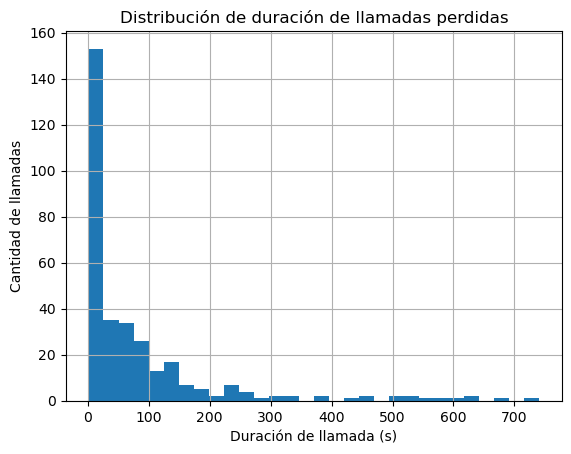

In [25]:
# Revisamos la distribución de duración de llamadas perdidas 

lost_calls_w_duration['call_duration'].hist(bins=30)
plt.xlabel('Duración de llamada (s)')
plt.ylabel('Cantidad de llamadas')
plt.title('Distribución de duración de llamadas perdidas')
plt.show()

In [26]:
# Normalizaremos a 0 las llamadas perdidas con duración pequeña (<=5s)
data.loc[(data['is_missed_call'] == 1) & (data['call_duration'] <= 5), 'call_duration'] = 0

# Y eliminaremos anomalías graves (duración >5s para llamadas perdidas)
data = data.drop(data[(data['is_missed_call'] == 1) & (data['call_duration'] > 5)].index)


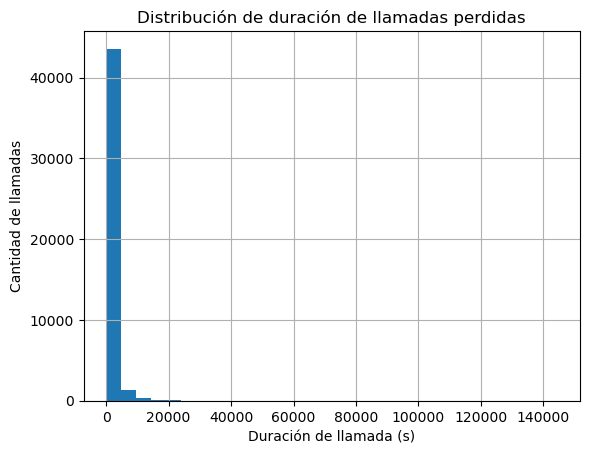

In [27]:
# Revisamos la distribución de duración de llamadas perdidas 

data['call_duration'].hist(bins=30)
plt.xlabel('Duración de llamada (s)')
plt.ylabel('Cantidad de llamadas')
plt.title('Distribución de duración de llamadas perdidas')
plt.show()

## Enriquecimiento de datos

In [28]:
# Calcular total de llamadas por operador
operator_stats = (
    data.groupby(data.operator_id, as_index=False)
    .agg({'calls_count': 'sum'})
    .rename(columns={'calls_count': 'total_calls'})
    )
operator_stats.sample(5)

,operator_id,total_calls
108,893804,6570
727,937980,236
8,882476,3
375,914170,19
450,919372,1627


In [29]:
# Calcular procentaje de llamadas perdidas

missed_calls = (
    data.groupby(data.operator_id, as_index=False)
    .agg({'is_missed_call': 'mean'})
    .rename(columns={'is_missed_call': 'missed_call_rate'})
)

operator_stats = operator_stats.merge(missed_calls, on='operator_id', how='left')
operator_stats

,operator_id,total_calls,missed_call_rate
0,879896,1131,0.390625
1,879898,7973,0.400000
2,880020,54,0.318182
3,880022,219,0.434211
4,880026,2439,0.474747
...,...,...,...
1087,972410,77,0.500000
1088,972412,61,0.400000
1089,972460,70,0.333333
1090,973120,3,0.500000


In [30]:
# Calcular duraciones de llamadas

duration_rate = (
    data.groupby('operator_id', as_index = False)
    .agg({'total_call_duration': 'mean', 
          'call_duration': 'mean' })
    .rename(columns={
        'total_call_duration': 'avg_total_call_duration',
        'call_duration': 'avg_call_duration'
    })
)
operator_stats = operator_stats.merge(duration_rate, on='operator_id', how='left')

# Duración de tiempo de espera
operator_stats['avg_waiting_time'] = (operator_stats.avg_total_call_duration - operator_stats.avg_call_duration).round(2)

In [31]:
operator_stats.head()

,operator_id,total_calls,missed_call_rate,avg_total_call_duration,avg_call_duration,avg_waiting_time
0,879896,1131,0.390625,761.148438,650.476562,110.67
1,879898,7973,0.400000,1567.364000,1115.504000,451.86
2,880020,54,0.318182,119.272727,104.090909,15.18
3,880022,219,0.434211,298.407895,240.842105,57.57
4,880026,2439,0.474747,978.111111,856.939394,121.17


In [32]:
# Revisamos llamadas salientes

out_calls = (
    data.query('direction_in == True')
    .groupby('operator_id')['calls_count'].sum()
    .reset_index(name = 'outgoing_calls')
)

operator_stats = operator_stats.merge(out_calls, on = 'operator_id', how='left')

In [33]:
operator_stats.sample(5)

,operator_id,total_calls,missed_call_rate,avg_total_call_duration,avg_call_duration,avg_waiting_time,outgoing_calls
703,937786,15,0.285714,183.428571,146.285714,37.14,3.0
1088,972412,61,0.400000,909.600000,699.600000,210.00,1.0
80,891416,966,0.447619,443.866667,399.428571,44.44,152.0
780,940596,490,0.352941,1440.882353,895.117647,545.76,1.0
968,953952,9,0.000000,246.500000,215.500000,31.00,9.0


In [34]:
# Remplazamos los valores NaN en outgoing_calls por 0

operator_stats['outgoing_calls'] = operator_stats['outgoing_calls'].fillna(0).astype(int)


In [35]:
operator_stats.sample(5)

,operator_id,total_calls,missed_call_rate,avg_total_call_duration,avg_call_duration,avg_waiting_time,outgoing_calls
977,954642,417,0.470588,1598.588235,1095.176471,503.41,0
197,901492,42,0.030303,145.333333,115.181818,30.15,39
54,890232,39,0.000000,1017.470588,986.352941,31.12,0
797,940848,2,0.500000,55.000000,23.500000,31.50,0
109,894120,24,0.090909,210.272727,165.454545,44.82,24


In [36]:
data.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,direction_in,direction_out
1,166377,2019-08-05 00:00:00+03:00,True,880022,1,3,0,5,False,True
2,166377,2019-08-05 00:00:00+03:00,True,880020,1,1,0,1,False,True
3,166377,2019-08-05 00:00:00+03:00,True,880020,0,1,10,18,False,True
4,166377,2019-08-05 00:00:00+03:00,False,880022,1,3,0,25,False,True
5,166377,2019-08-05 00:00:00+03:00,False,880020,0,2,3,29,False,True
